In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

In [ ]:
#Inner Join
# ind_1    ind_2   ind_inner
#          0         0 None
# 1        1         1 1
# 2        2         2 2
# 3        3         3 3
# 4                  4 None
# 5                  5 None


In [11]:
df1 = pd.read_excel('X_bp.xlsx')

In [12]:
df

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [13]:
df2 = pd.read_excel('X_nup.xlsx')

In [14]:
df2

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


In [16]:
df1 = df1.merge(df2, on = ['Unnamed: 0'])

In [17]:
df1.columns

Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [19]:
df1.columns[1]

'Соотношение матрица-наполнитель'

# Разведочный Анализ данных

Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
 11  Угол нашивки, гра

В данных не присутствуют выбросы.

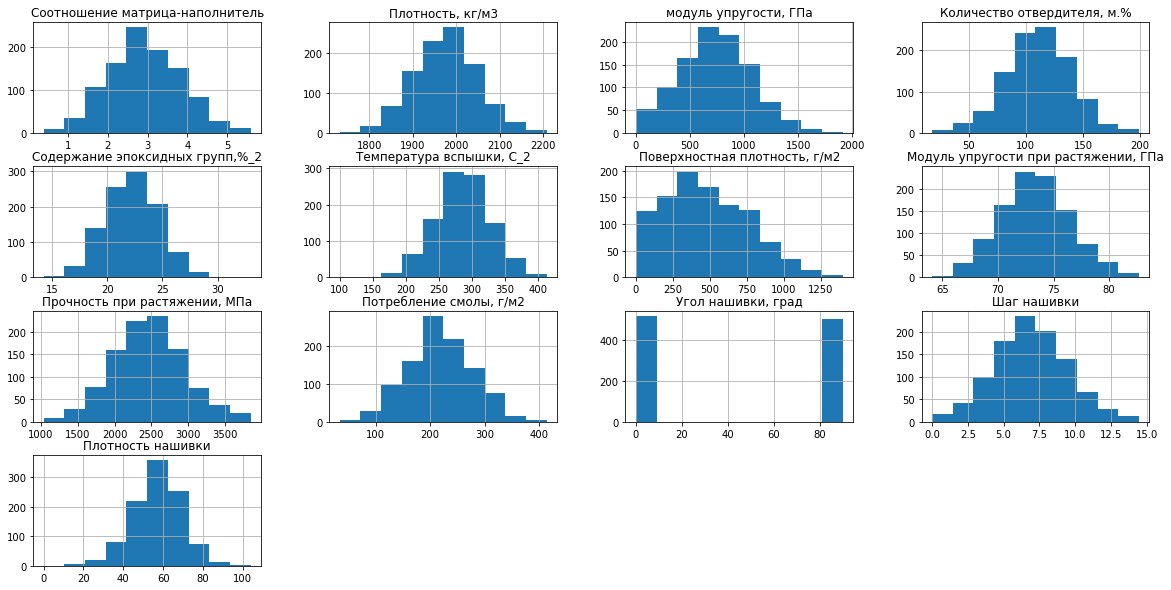

In [24]:
histograms = df1[df1.columns[1:]].hist(figsize=(20,10))

In [29]:
df1[df1.columns[-3]].value_counts()

0.0     520
90.0    503
Name: Угол нашивки, град, dtype: int64

Видно, что большинство признаков распределены равномерно. 
Для Поверхностной плотсности данные смещены влево. То есть обладают левосторонней ассиметрией.
Для угла нашивки распределение дискретное. Так как в частотном анализе присутсвуют два значения. 

<AxesSubplot:>

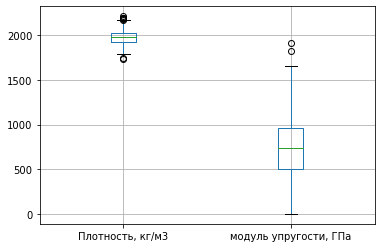

In [30]:
df1.boxplot(column=[df1.columns[2], df1.columns[3]])

Так как графики в разном масштабе, приведем их с помощью нормализации к одному масштабу.

In [36]:
df1 = df1.drop(df1.columns[0], axis = 1)

In [37]:
normalized_df=(df1-df1.mean())/df1.std()

<AxesSubplot:>

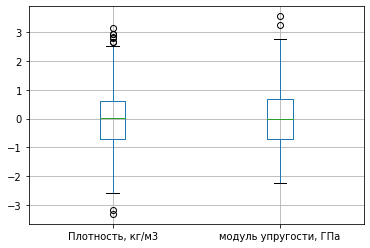

In [39]:
normalized_df.boxplot(column=[normalized_df.columns[1], normalized_df.columns[2]])

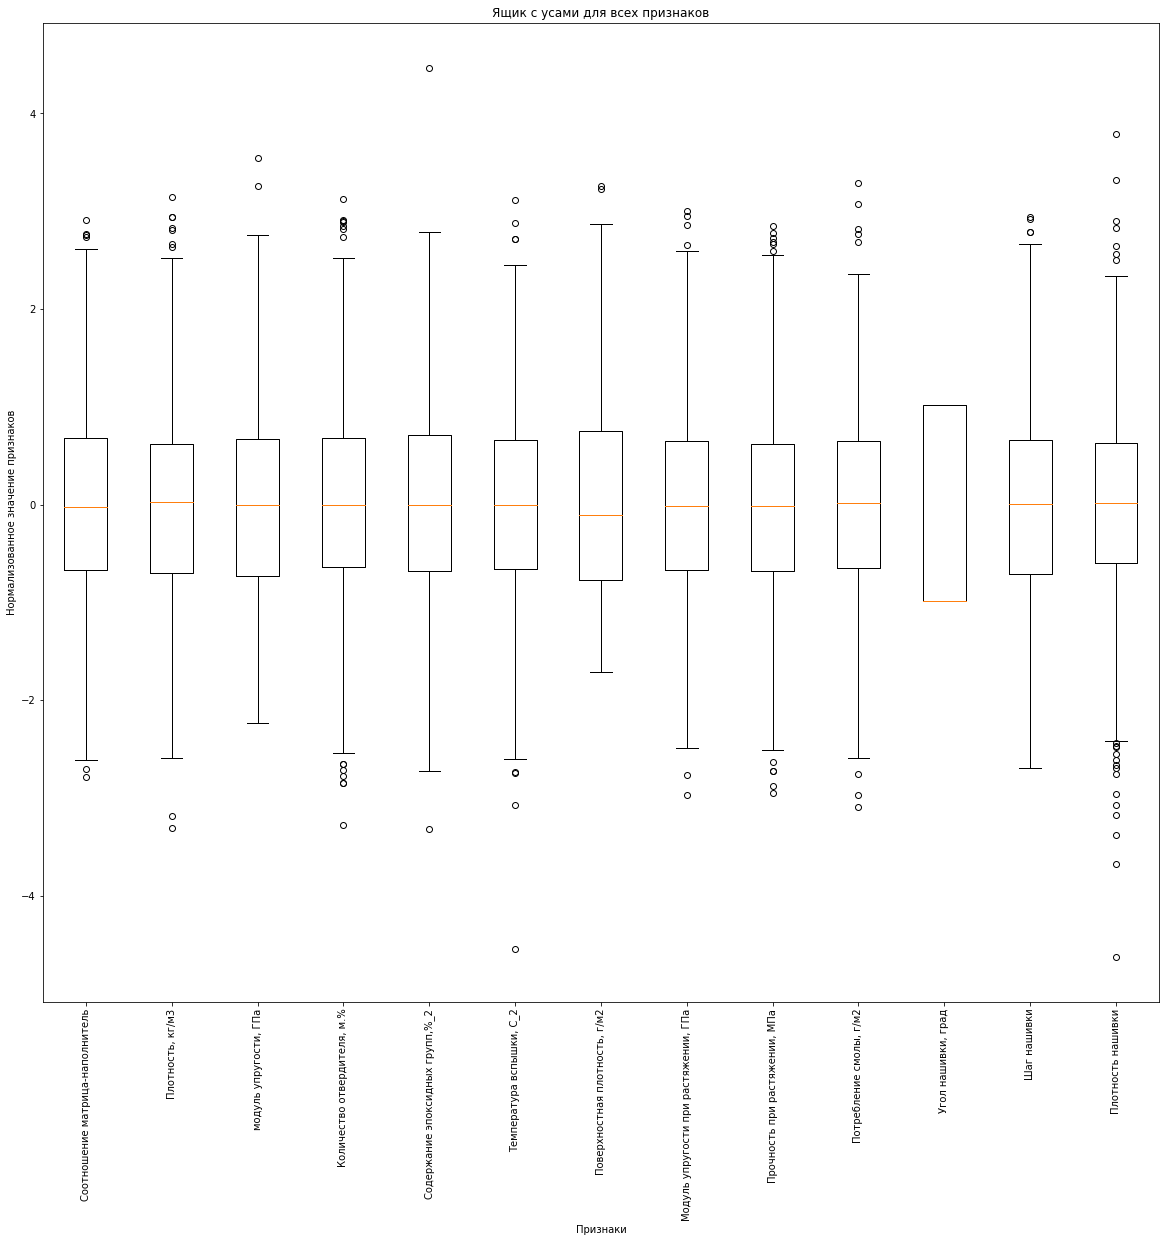

In [51]:
plt.figure(figsize=(20,18))
bp = plt.boxplot(
    # A data frame needs to be converted to an array before it can be plotted this way
    np.array(normalized_df),
    # You can use the column headings from the data frame as labels
    labels=list(normalized_df.columns)
)
plt.title('Ящик с усами для всех признаков')
plt.ylabel('Нормализованное значение признаков')
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.show()

Для большинства признаков интервалы нижнего квантиля одинаково. Для поерхностной плотности минимальное значение выше среднего. Точки показывают на выбросы, их мы удалим.

In [55]:
for el in df1.columns:
    mean = df1[el].mean()
    min_ = df1[el].min()
    max_ = df1[el].max()
    median = df1[el].median()
    print(f'Признак {el}, Среднее значение  {mean}, Минимальное значение {min_}, Максимальное значение {max_}, Медианное значение {median}', "\n")

Признак Соотношение матрица-наполнитель, Среднее значение  2.9303657734325506, Минимальное значение 0.389402605178414, Максимальное значение 5.59174159869754, Медианное значение 2.90687765033521 

Признак Плотность, кг/м3, Среднее значение  1975.7348881101548, Минимальное значение 1731.764635096, Максимальное значение 2207.77348061119, Медианное значение 1977.62165679058 

Признак модуль упругости, ГПа, Среднее значение  739.9232327560719, Минимальное значение 2.4369087535075, Максимальное значение 1911.53647700054, Медианное значение 739.664327697792 

Признак Количество отвердителя, м.%, Среднее значение  110.57076864736258, Минимальное значение 17.7402745562519, Максимальное значение 198.953207190451, Медианное значение 110.564839894065 

Признак Содержание эпоксидных групп,%_2, Среднее значение  22.24438954776772, Минимальное значение 14.2549854977161, Максимальное значение 33.0, Медианное значение 22.2307437560244 

Признак Температура вспышки, С_2, Среднее значение  285.882151351

In [56]:
df1.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [59]:
df1.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [61]:
df1.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [67]:
df_analytics =  {'Признак': df1.columns, 'Среднее значение': list(df1.mean()), 'Минимальное значение': list(df1.min()), 'Максимальное значение': list(df1.max()),  'Медианное значение': list(df1.median()), }
df_analytics = pd.DataFrame(data=df_analytics)

In [68]:
df_analytics

,Признак,Среднее значение,Минимальное значение,Максимальное значение,Медианное значение
0,Соотношение матрица-наполнитель,2.930366,0.389403,5.591742,2.906878
1,"Плотность, кг/м3",1975.734888,1731.764635,2207.773481,1977.621657
2,"модуль упругости, ГПа",739.923233,2.436909,1911.536477,739.664328
3,"Количество отвердителя, м.%",110.570769,17.740275,198.953207,110.564840
4,"Содержание эпоксидных групп,%_2",22.244390,14.254985,33.000000,22.230744
5,"Температура вспышки, С_2",285.882151,100.000000,413.273418,285.896812
6,"Поверхностная плотность, г/м2",482.731833,0.603740,1399.542362,451.864365
7,"Модуль упругости при растяжении, ГПа",73.328571,64.054061,82.682051,73.268805
8,"Прочность при растяжении, МПа",2466.922843,1036.856605,3848.436732,2459.524526
9,"Потребление смолы, г/м2",218.423144,33.803026,414.590628,219.198882


In [86]:
df1['Шаг нашивки'].sort_values().iloc[511]

6.9161438559491

In [81]:
#np.array(df1['Шаг нашивки']).sort()

In [ ]:
# 1 2 3 3 4 4 4 5 5 
# мода 4
# медиана (3+4)/2 = 3.5


In [91]:
df1[df1.columns[1:6]]

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2"
0,2030.000000,738.736842,30.000000,22.267857,100.000000
1,2030.000000,738.736842,50.000000,23.750000,284.615385
2,2030.000000,738.736842,49.900000,33.000000,284.615385
3,2030.000000,738.736842,129.000000,21.250000,300.000000
4,2030.000000,753.000000,111.860000,22.267857,284.615385
...,...,...,...,...,...
1018,1952.087902,912.855545,86.992183,20.123249,324.774576
1019,2050.089171,444.732634,145.981978,19.599769,254.215401
1020,1972.372865,416.836524,110.533477,23.957502,248.423047
1021,2066.799773,741.475517,141.397963,19.246945,275.779840


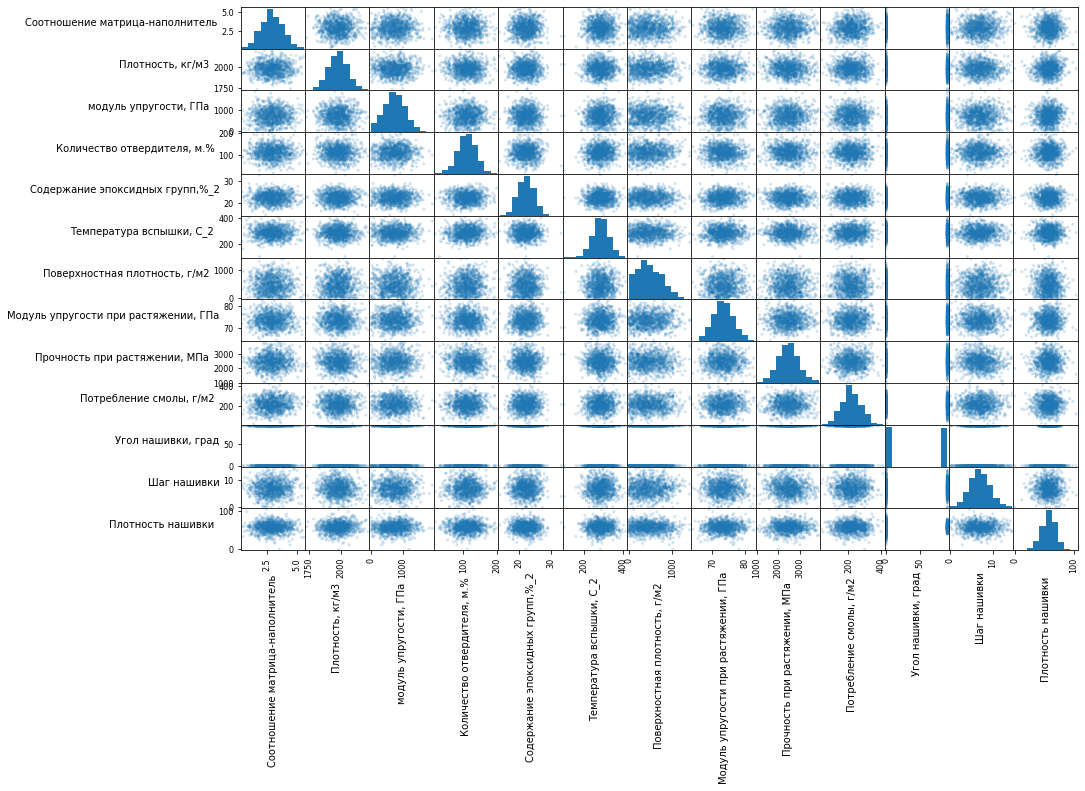

In [102]:
#pd.plotting.scatter_matrix(df1[df1.columns[0:13]],figsize=(15,10))
axes = pd.plotting.scatter_matrix(df1, alpha=0.2, figsize=(15,10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

Видно, что никаких корреляций не наблюдается.

In [103]:
df1.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


Удалим выбросы полученные из ящика с усами.

In [104]:
normalized_df[normalized_df.columns[1]]

0       0.736005
1       0.736005
2       0.736005
3       0.736005
4       0.736005
          ...   
1018   -0.320727
1019    1.008478
1020   -0.045600
1021    1.235126
1022   -1.157227
Name: Плотность, кг/м3, Length: 1023, dtype: float64

In [109]:
quant_075 = np.quantile(normalized_df[normalized_df.columns[1]], 0.75)

In [116]:
normalized_df.columns[1]

'Плотность, кг/м3'

In [117]:
normalized_df[normalized_df[normalized_df.columns[1]] > quant_075]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.175205,0.736005,-0.003593,-2.847435,0.009753,-4.539994,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-1.130977,-0.012463
1,-1.175205,0.736005,-0.003593,-2.140619,0.625695,-0.030940,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-1.130977,0.230433
2,-1.175205,0.736005,-0.003593,-2.144153,4.469769,-0.030940,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-1.130977,1.040086
3,-1.175205,0.736005,-0.003593,0.651304,-0.413244,0.344815,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-0.740880,-0.822116
4,-0.174147,0.736005,0.039599,0.045562,0.009753,-0.030940,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-0.740880,-0.012463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-1.478209,0.848436,0.084710,-0.967603,1.405988,-0.885856,1.037438,-0.656994,0.621703,0.812469,1.016261,-1.618168,0.528527
1008,-0.799813,0.816385,2.098017,-1.098370,-1.394627,-0.216895,-0.314866,-0.019162,2.516949,2.120032,1.016261,-0.002909,-0.562238
1010,-1.230062,1.189980,0.840329,2.154571,0.504259,-0.208702,-1.638639,0.445742,-1.104216,0.863019,1.016261,-0.798680,1.658434
1019,0.562466,1.008478,-0.893890,1.251460,-1.099040,-0.773430,-0.469478,-0.130730,-0.219366,-1.685636,1.016261,1.430247,-0.275536


In [126]:
Q1 = normalized_df[normalized_df.columns[0]].quantile(0.25)
Q3 = normalized_df[normalized_df.columns[0]].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = normalized_df[(normalized_df[normalized_df.columns[0]] < Q1 - threshold * IQR) | (normalized_df[normalized_df.columns[0]] > Q3 + threshold * IQR)]

In [127]:
outliers

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
237,2.914270,1.978105,0.556413,0.393779,-0.180815,0.095008,-1.238407,0.276833,-0.542078,1.201122,-0.983037,0.110099,-2.127059
284,2.731836,0.373491,-0.651401,0.979680,-0.602886,2.074613,-0.764821,-1.550652,-1.296479,0.129118,-0.983037,-1.058573,-2.099874
378,-2.701449,-0.679843,0.765636,-0.784129,-0.040211,-3.068303,1.665362,0.923873,0.647856,-1.519528,-0.983037,0.163039,-1.929213
505,2.762300,-0.773723,0.838963,0.299604,0.505926,-0.257444,-1.569781,2.856389,-0.824436,1.005880,-0.983037,-2.192018,-0.553031
673,-2.782415,-0.787137,-0.417374,-0.608716,1.131070,-1.650547,-0.559985,-0.524260,-0.028072,1.104292,1.016261,0.491945,0.071661
877,2.765154,1.685060,1.543612,-0.066941,-0.861335,-1.523219,-0.053629,-2.138863,-0.308166,0.021931,1.016261,0.661895,-0.755424


In [135]:
final_ind = []
for column in normalized_df.columns:
    Q1 = normalized_df[column].quantile(0.25)
    Q3 = normalized_df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = normalized_df[(normalized_df[column] < Q1 - threshold * IQR) | (normalized_df[column] > Q3 + threshold * IQR)]
    mass = list(outliers[column].reset_index()['index'])
    for ind in mass:
        final_ind.append(ind)

In [140]:
ind_for_delete = list(set(final_ind))

In [142]:
normalized_cleaned = normalized_df.drop(ind_for_delete)

In [160]:
df1 = df1.drop(ind_for_delete)

# Обучение модели

Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

## Градиентный бустинг

In [148]:
y = normalized_cleaned[normalized_cleaned.columns[7]]
X = normalized_cleaned.drop(normalized_cleaned.columns[7], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

In [192]:
y1 = df1[df1.columns[7]]
X1 = df1.drop(df1.columns[7], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=rs)

In [154]:
rs = 42

In [193]:
reg = GradientBoostingRegressor(random_state=rs)
reg.fit(X_train1, y_train1)

GradientBoostingRegressor(random_state=42)

In [222]:
pred1 = reg.predict(X_test1)

In [223]:
mean_squared_error(y_test1, pred1)

9.562967748223006

In [226]:
max_depth = [1, 2, 3, 4, 5, 6]
mse_ = []
for el in max_depth:
    reg = GradientBoostingRegressor(random_state=rs, max_depth = el)
    reg.fit(X_train1, y_train1)
    pred1 = reg.predict(X_test1)
    mse_.append(mean_squared_error(y_test1, pred1))

In [227]:
mse_

[8.731291495546365,
 8.931545667609036,
 9.562967748223006,
 9.761301623489702,
 10.343320496014059,
 9.97964805176617]

In [238]:
learning_rate = [0.0001, 0.001, 0.005, 0.0125, 0.025,0.0375, 0.05, 0.1, 0.15, 0.2, 0.4]
mse_lr = []
for lr_ in learning_rate:
    reg = GradientBoostingRegressor(random_state=rs, max_depth = 1, learning_rate = lr_)
    reg.fit(X_train1, y_train1)
    pred1 = reg.predict(X_test1)
    mse_lr.append((mean_squared_error(y_test1, pred1), lr_))

In [239]:
mse_lr

[(8.764753778428034, 0.0001),
 (8.75708463920902, 0.001),
 (8.740631441678113, 0.005),
 (8.709280578180156, 0.0125),
 (8.663764158512567, 0.025),
 (8.651351501952503, 0.0375),
 (8.658636240090791, 0.05),
 (8.731291495546365, 0.1),
 (8.81912632694253, 0.15),
 (8.835563449520459, 0.2),
 (9.159913138323407, 0.4)]

In [245]:
n_estimators = [50, 75,100,125,150, 200, 300, 400]
mse_estim = []
for estim_ in n_estimators:
    reg = GradientBoostingRegressor(random_state=rs, max_depth = 1, learning_rate = 0.0375, n_estimators = estim_)
    reg.fit(X_train1, y_train1)
    pred1 = reg.predict(X_test1)
    mse_estim.append((mean_squared_error(y_test1, pred1), estim_))

In [246]:
mse_estim

[(8.684997948290832, 50),
 (8.664139011416925, 75),
 (8.651351501952503, 100),
 (8.658590868325495, 125),
 (8.659134655799527, 150),
 (8.672787491140962, 200),
 (8.733505691705004, 300),
 (8.79187507197859, 400)]

Оптимальное значение по градиентному бустингу с перебором по сетке 8.651. Значения гиперпараметров lr = 0.0375, n_estimators = 100, max_depth = 1

In [250]:
reg = GradientBoostingRegressor(random_state=rs, max_depth = 1, learning_rate = 0.0375, n_estimators = 100)
reg.fit(X_train1, y_train1)

GradientBoostingRegressor(learning_rate=0.0375, max_depth=1, random_state=42)

In [252]:
import pickle
pickle.dump(reg, open('regressor.pkl', 'wb'))

In [258]:
len(reg.feature_importances_)

12

In [286]:
np.array(list(X_test1.iloc[0])).reshape(1, 12)

array([[   2.87156168, 2021.7546411 ,  674.19889124,  109.24657063,
          21.13257276,  283.55681681,  534.46028269, 1823.25651189,
         202.32614651,    0.        ,   10.79599724,   70.76881625]])

In [278]:
mass = np.array([-2]*12)
mass

array([-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2])

In [287]:
y_pred = reg.predict(np.array(list(X_test1.iloc[0])).reshape(1, 12))

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [288]:
y_pred

array([73.13419177])

In [289]:
y_test1

359    77.825677
76     69.181599
232    71.337572
730    77.856284
759    70.364622
         ...    
416    69.492433
484    75.280332
329    74.148570
460    69.367179
622    67.803680
Name: Модуль упругости при растяжении, ГПа, Length: 281, dtype: float64

## Решающее дерево

In [198]:
DT = DecisionTreeRegressor(random_state=rs)
DT.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=42)

In [199]:
pred1_DT = DT.predict(X_test1)

In [200]:
mean_squared_error(y_test1, pred1_DT)

18.819062685144957

## Линейная регрессия

In [203]:
lr = LinearRegression().fit(X_train1, y_train1)

In [204]:
pred1_lr = lr.predict(X_test1)

In [205]:
mean_squared_error(y_test1, pred1_lr)

8.759731042865322

Обучение по кросс валидации на 5 фолдах.

In [221]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(reg, X1, y1, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MSE: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

MSE: -10.039 (1.247)


## Нейронная сеть по предсказанию матрица-наполнитель

In [300]:
y_matr = df1[df1.columns[0]]
X_matr = df1.drop(df1.columns[0], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_matr, y_matr, test_size=0.3, random_state=rs)

In [301]:
regr = MLPRegressor(random_state=rs, max_iter=500).fit(X_train1, y_train1)
pred_mlp = regr.predict(X_test1)

In [302]:
mean_squared_error(y_test1, pred_mlp)

12.667826402896516

# Разработка графического интерфейса фласк

In [260]:
len(X1.columns)

12

In [259]:
X1.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки',
       'Плотность нашивки'],
      dtype='object')

In [290]:
X1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,2071.715856,197.126067,90.0,6.313201,58.261074
